In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [3]:
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/CS285-Project/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def getXYpeer(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn', peer_num=2):
    result = []
    for i in range(peer_num):
        Xi, Yi = getXY(exp_name, "Agent%d_"%i+X_label, "Agent%d_"%i+Y_label)
        result.append((Xi, Yi))
    return result

def check(exp_name):
    X, Y = getXY(exp_name)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [6]:
ensemble2 = "sac_ensemble_2_agents_HalfCheetah-v4_08-12-2022_23-15-06"

check(ensemble2)

Iteration 0 | Train steps: 1500 | Return: -45.406795501708984
Iteration 1 | Train steps: 3000 | Return: -55.677879333496094
Iteration 2 | Train steps: 4500 | Return: -44.15492248535156
Iteration 3 | Train steps: 6000 | Return: -13.053997993469238
Iteration 4 | Train steps: 7500 | Return: -45.19124221801758
Iteration 5 | Train steps: 9000 | Return: -59.393531799316406
Iteration 6 | Train steps: 10500 | Return: -47.723365783691406
Iteration 7 | Train steps: 12000 | Return: -44.01038360595703
Iteration 8 | Train steps: 13500 | Return: -64.15074157714844
Iteration 9 | Train steps: 15000 | Return: -54.42462921142578
Iteration 10 | Train steps: 16500 | Return: -39.34720993041992
Iteration 11 | Train steps: 18000 | Return: -52.0704345703125
Iteration 12 | Train steps: 19500 | Return: -49.233055114746094
Iteration 13 | Train steps: 21000 | Return: -57.37571334838867
Iteration 14 | Train steps: 22500 | Return: -51.558509826660156
Iteration 15 | Train steps: 24000 | Return: -47.96044921875
Itera

### SAC Peer Learning HW3 comparison experiment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


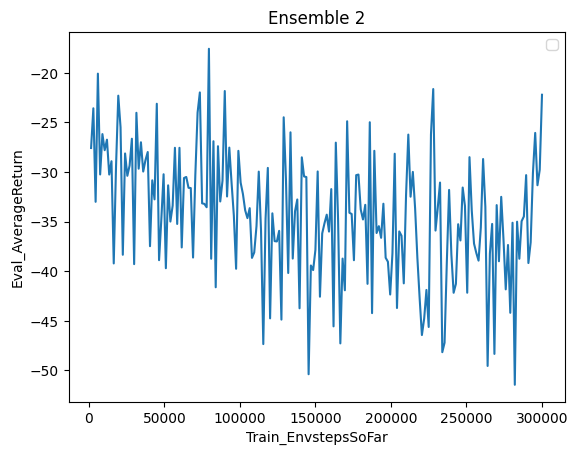

In [9]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
exp_names = [ensemble2]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1) # , label=exp_name
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Ensemble 2")
plt.savefig("ensemble2.png")
plt.show()